## MeCabで形態素解析を行う

- 参考：[【Python】形態素解析エンジンMeCabをPythonでやってみた。 せっかくなのでパーソルP&T社長メッセージから単語を出現数順に抽出してみたよ。](https://note.com/smkt_interview/n/nafebd60ae6bc)

- 参考：[Python3 + Mecab で形態素解析してみた](https://qiita.com/Haruka-Ogawa/items/c2116f0eb5c859955d63)

- 参考：[【Python】ゲームアプリ（Google Play）のレビュー分析を行ってみた（スコア推移・形態素解析編）](https://qiita.com/hastings/items/41243ee723fe56568f60)

わかち書きとは、テキスト文章を単語に分解することを指します。

Mecabは分を単語に分解するだけでなく、各単語の品詞や読みなどの情報を付与することが可能です。このような品詞情報の付与まで含んだわかち書きを形態素解析と呼びます。

In [24]:
# 例 わかち書き
import MeCab
wakati = MeCab.Tagger("-Owakati")
wakati.parse("pythonが大好きです").split()

['python', 'が', '大好き', 'です']

In [41]:
import pandas as pd
df1 = pd.read_csv("csvfile/moving1.csv")
df2 = pd.read_csv("csvfile/moving2.csv")
df3 = pd.read_csv("csvfile/moving3.csv")
df4 = pd.read_csv("csvfile/moving4.csv")
df5 = pd.read_csv("csvfile/moving5.csv")

df1 = df1.drop(["Unnamed: 0","compare"], axis=1)
df2 = df2.drop(["Unnamed: 0"], axis=1)
df3 = df3.drop(["Unnamed: 0"], axis=1)
df4 = df4.drop(["Unnamed: 0"], axis=1)
df5 = df5.drop(["Unnamed: 0"], axis=1)

In [42]:
df1.head()

,date,title,rate,comment
0,2020-01-07,対応が早かった,5.00,料金が自分の納得した範囲だったので。良かった点、引越し先の部屋の状況など話を聞いてくれてアド...
1,2020-08-05,早く連絡を頂いて、対応が早くて金額にも満足でした。,4.75,悪いところはないです。丁寧な、説明をしていただき暑いなか、ありがとうございました。金額も想定...
2,2020-08-09,社内の連絡不足、そして約束を守っていただけない。,2.25,【見積もり時の対応】大変人当たりの良い方が対応して下さった。しかしお約束していた時間の5分前...
3,2020-09-10,丁寧でまた利用したいと思った,5.00,【見積もり時の対応】実際に訪問で荷物の大きさや数を確認してもらったので、引っ越し当日に見積り...
4,2020-09-18,安心してお願いできました。,5.00,引っ越しスタッフのテキパキとした指示やチームワークの働き様子に安心感があり疲労した様子も見せ...


In [43]:
df2.head()

,date,title,rate,comment
0,2017-06-08,対応が誠実丁寧で信頼できる,4.00,見積もりもこちらの要望内に収めていただき、引っ越し当日も丁寧にしていただきました。ベッドを運...
1,2019-05-13,引越後のアフターフォローの連絡もあり満足しました,5.00,低価格で作業もスピーディーで大変良かったです。また、機会があった場合は利用させて頂きたいと思...
2,2019-05-14,速いけれど少し雑。,4.25,・税額分値引きしてくれました。・口コミで家具の破損がある、対応が悪いと書かれていた。今回家具...
3,2019-05-26,熱意有り、言葉遣いが丁寧、誠実さを感じました。,4.25,【見積もり時の対応】電話対応が早く、営業の方の熱意や言葉遣いも良く、好感が持てました。【料金...
4,2019-06-03,あまり良くはなかったです,2.75,値段が安いので仕方がないですが、壁に傷防止のカバーはありません。作業中に壁がすこし剥がれたの...


In [44]:
df3.head()

,date,title,rate,comment
0,2017-07-24,親切丁寧。,4.75,見積りを依頼してすぐにアポイントの連絡をくれた。またこちらの希望日時にきてくれるとのことで最...
1,2017-07-30,仕事をテキパキこなしてくれた。,4.75,他の引越屋さんは指定した時期では無理だと言われましたが、アリさんは快く引き受けてくれ、予算も...
2,2017-08-11,見積もりの方も作業をする方も対応や話し方が良かった,5.00,予算の料金よりも安く、その場ですぐに見積もり訪問した方が判断して1万以上引いてくれた。他のと...
3,2017-08-12,ありさんマーク引越社には、二度と頼まない,2.75,これから引っ越しをする方は、良く話してから決めた方が良いと思います。口頭だけでなく、書面上で...
4,2017-08-15,作業早く、礼儀正しく、てきぱきとされていた,5.00,値引き交渉を持ち掛けた際、他の業者とは違い上司に交渉をしそれを実現してくれた事に感動。粗品な...


In [45]:
df4.head()

,date,title,rate,comment
0,2018-01-13,一生懸命さが好感がもてた,4.75,＜良かった点＞１.海外の家具が多く、大きかったが丁寧に運んでくれた。２．冷蔵庫や洗濯機の裏な...
1,2018-01-18,電話応対も作業員の方も親切丁寧で大変良かった。,4.50,3社の見積もりをお願いしたのですが最初に来ていただいたアークさんにお願いしてしまいました。ア...
2,2018-01-21,とても若いチームでしたが、チームワークが良いという…,4.25,営業マンはなかなか粘り強い方でした。3時間程交渉、結局いちばん安くしていただきました。クーラ...
3,2018-01-31,電話対応から作業員の方まで対応はよかったです,4.50,午後のフリー便にしたため、スタートが六時だったのが大変でした。選んだのは自分なのですが、お得...
4,2018-02-01,見積・ブッキング・作業いずれもスピーディ,5.00,【見積もり時の対応】非常に早かった。まずメールで暫定額提示、電話で日程確保も含め迅速に対応し...


In [46]:
df5.head()

,date,title,rate,comment
0,2018-04-10,テキパキ、丁寧。,4.00,急な引越しで、日にちもギリギリでしたが、なんとか配車いただき、値段もギリギリまで割引いていた...
1,2018-08-10,丁寧な応対,4.25,前回で二回目ですが、1回目は作業員の方の誘導が良く、今回は見積もりにきた方の対応が、非常に良...
2,2018-11-03,大手で急な依頼でも対応してくれる。,4.50,引越しを依頼していた地元の業者と連絡が取れず、前日にドタキャン。代替えとして前日に依頼し、数...
3,2019-03-30,信頼できる。,3.50,繁忙期だったので、対応が粗雑だった。引っ越し日は指定日以外ダメ、今の時点で了解を、もらわない...
4,2019-05-12,あまり良くなかった,2.25,良かった点:手際が良かった悪かった点:手順と料金支払い方法が無かったので、後払いで良いと考え...


In [50]:
df = pd.concat([df1, df2])
df = pd.concat([df, df3])
df = pd.concat([df, df4])
df = pd.concat([df, df5])
df["date"] = pd.to_datetime(df["date"])
df.sort_values(by = 'date', ascending = True, inplace = True)
df.head()

,date,title,rate,comment
0,2017-06-08,対応が誠実丁寧で信頼できる,4.00,見積もりもこちらの要望内に収めていただき、引っ越し当日も丁寧にしていただきました。ベッドを運...
0,2017-07-24,親切丁寧。,4.75,見積りを依頼してすぐにアポイントの連絡をくれた。またこちらの希望日時にきてくれるとのことで最...
1,2017-07-30,仕事をテキパキこなしてくれた。,4.75,他の引越屋さんは指定した時期では無理だと言われましたが、アリさんは快く引き受けてくれ、予算も...
2,2017-08-11,見積もりの方も作業をする方も対応や話し方が良かった,5.00,予算の料金よりも安く、その場ですぐに見積もり訪問した方が判断して1万以上引いてくれた。他のと...
3,2017-08-12,ありさんマーク引越社には、二度と頼まない,2.75,これから引っ越しをする方は、良く話してから決めた方が良いと思います。口頭だけでなく、書面上で...


In [51]:
#インストール
!pip install mecab-python3

#辞書インストール
!pip install unidic-lite

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [67]:
df.to_csv("concat_moving.csv")

In [68]:
df = pd.read_csv("csvfile/concat_moving.csv")

エラーの対処

[MeCabでリストを分かち書きしようとすると'TypeError: in method 'Tagger_parse', argument 2 of type 'char const *''が出る](https://qiita.com/katuta_games/items/7a9f9334dc5417b49367)

In [54]:
# MeCabで形態素解析を行う
import MeCab

def mecab_text(text):

    #MeCabのインスタンスを作成（辞書はmecab-ipadic-neologdを使用）
    mecab = MeCab.Tagger('-Owakati')

    #形態素解析
    text = str(text).lower() #　追加したところ
    node = mecab.parseToNode(text)

    #形態素解析した結果を格納するリスト
    wordlist = []

    while node:
        #名詞のみリストに格納する
        if node.feature.split(',')[0] == '名詞':
            wordlist.append(node.surface)
        #形容詞を取得、elifで追加する
        elif node.feature.split(',')[0] == '形容詞':
            wordlist.append(node.surface)
        #動詞を取得、elifで追加する
        #elif node.feature.split(',')[0] == '動詞':
            #wordlist.append(node.surface)
        node = node.next
    return wordlist

# 形態素結果をリスト化し、データフレームdf1に結果を列追加する
df['words_comment'] = df['comment'].apply(mecab_text)
df['words_title'] = df['title'].apply(mecab_text)

# nlplot
- 参考：[NLPLOTが凄い！自然言語を可視化・分析できるPYTHONライブラリ](https://boxcode.jp/nlplot%E3%81%8C%E5%87%84%E3%81%84%EF%BC%81%E8%87%AA%E7%84%B6%E8%A8%80%E8%AA%9E%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%83%BB%E5%88%86%E6%9E%90%E3%81%A7%E3%81%8D%E3%82%8Bpython%E3%83%A9%E3%82%A4)
- 参考：[nlplotを使って自然言語データを可視化してみた](https://qiita.com/DS27/items/c8576c1bd71e3ff09369)

In [55]:
! pip install nlplot

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


 ### N-gram bar chart

In [56]:
# nlplotで直近1カ月のレビューを可視化・分析
# 頻出単語
import nlplot

npt_title = nlplot.NLPlot(df, target_col='words_title')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt_title.get_stopword(top_n=0, min_freq=0)

npt_title.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)


100%|██████████| 18920/18920 [00:00<00:00, 669684.14it/s]


In [57]:
npt_comment = nlplot.NLPlot(df, target_col='words_comment')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt_comment.get_stopword(top_n=0, min_freq=0)

npt_comment.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)


100%|██████████| 18920/18920 [00:00<00:00, 143823.82it/s]


### N-gram tree Map

In [58]:
# 単語数の分布
npt_title.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)


100%|██████████| 18920/18920 [00:00<00:00, 480059.48it/s]


In [59]:
# 単語数の分布
npt_comment.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)


100%|██████████| 18920/18920 [00:00<00:00, 138241.64it/s]


### Histogram of the word count

In [60]:
npt_title.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [61]:
npt_comment.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

In [62]:
npt_title.wordcloud(
    stopwords=stopwords,
    width=100,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

In [63]:
npt_comment.wordcloud(
    stopwords=stopwords,
    width=100,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    mask_file=None,
    save=True
)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18920 entries, 0 to 2979
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           18920 non-null  datetime64[ns]
 1   title          18887 non-null  object        
 2   rate           18920 non-null  float64       
 3   comment        18920 non-null  object        
 4   words_comment  18920 non-null  object        
 5   words_title    18920 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ MB


<AxesSubplot: xlabel='date'>

<Figure size 432x288 with 0 Axes>

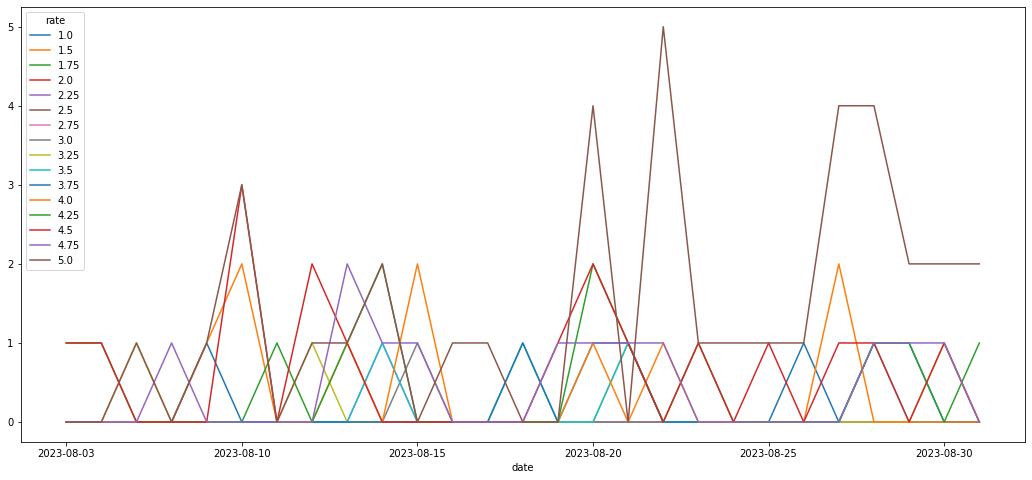

In [69]:
df_score = df[["date", "rate"]]
df_score = pd.crosstab(df["date"], df["rate"], dropna=False)
#df_score = df_score.resample('D').sum()

date_start = "2023-08-01"
date_end   = "2023-08-31"

df_score_ex = df_score[date_start:date_end]
plt.figure()
df_score_ex.plot(figsize=(18,8))